In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [4]:
 classifier = Sequential()
classifier.add(Convolution2D(32, kernel_size=(3, 3),activation='linear',input_shape=(64,64,3),padding='same'))
classifier.add(Dropout(0.2))
classifier.add(MaxPooling2D((2, 2),padding='same'))
classifier.add(Convolution2D(64, (3, 3), activation='relu',padding='same'))
classifier.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
classifier.add(Convolution2D(128, (3, 3), activation='relu',padding='same'))
classifier.add(LeakyReLU(alpha=0.1))  
classifier.add(Dropout(0.2))
classifier.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
classifier.add(Flatten())
classifier.add(Dense(128, activation='linear'))
classifier.add(Dropout(0.5))
classifier.add(LeakyReLU(alpha=0.1))                  
classifier.add(Dense(2, activation='softmax'))

W1105 14:30:17.333547  7280 deprecation_wrapper.py:119] From c:\users\jean lima\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1105 14:30:17.411386  7280 deprecation_wrapper.py:119] From c:\users\jean lima\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1105 14:30:17.440847  7280 deprecation_wrapper.py:119] From c:\users\jean lima\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1105 14:30:17.494034  7280 deprecation_wrapper.py:119] From c:\users\jean lima\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_w

In [5]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

W1105 14:30:20.583108  7280 deprecation_wrapper.py:119] From c:\users\jean lima\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1105 14:30:20.621355  7280 deprecation_wrapper.py:119] From c:\users\jean lima\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
training_set = train_datagen.flow_from_directory(
        'cell_images_train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'cell_images_test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [9]:
epochs = 15

history = classifier.fit_generator(
        training_set,
        steps_per_epoch=2700//32,
        epochs=epochs,
        validation_data=test_set,
        validation_steps=300//32,
        verbose = 1)

W1105 14:31:46.505171  7280 deprecation.py:323] From c:\users\jean lima\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/15
84/84 [==============================] - 25s 299ms/step - loss: 0.7262 - acc: 0.5205 - val_loss: 0.6899 - val_acc: 0.6215
Epoch 2/15
84/84 [==============================] - 24s 281ms/step - loss: 0.6776 - acc: 0.5796 - val_loss: 0.6310 - val_acc: 0.6146
Epoch 3/15
84/84 [==============================] - 24s 282ms/step - loss: 0.6366 - acc: 0.6317 - val_loss: 0.4772 - val_acc: 0.7778
Epoch 4/15
84/84 [==============================] - 24s 283ms/step - loss: 0.4122 - acc: 0.8185 - val_loss: 0.2597 - val_acc: 0.9236
Epoch 5/15
84/84 [==============================] - 24s 282ms/step - loss: 0.2178 - acc: 0.9260 - val_loss: 0.2170 - val_acc: 0.9375
Epoch 6/15
84/84 [==============================] - 24s 283ms/step - loss: 0.2102 - acc: 0.9315 - val_loss: 0.2123 - val_acc: 0.9306
Epoch 7/15
84/84 [==============================] - 24s 283ms/step - loss: 0.1759 - acc: 0.9420 - val_loss: 0.1823 - val_acc: 0.9306
Epoch 8/15
84/84 [==============================] - 24s 282ms/step - 

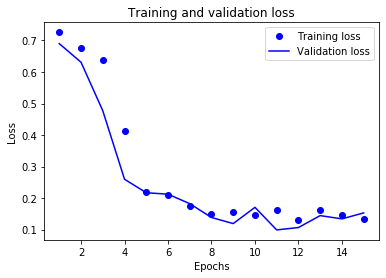

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1,  epochs+1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Training and validation loss')
plt.show()

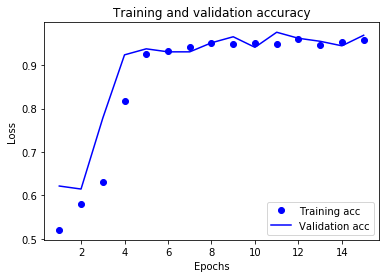

In [12]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Training and validation accuracy')
plt.show()

In [14]:
import pandas as pd
import numpy as np

predict_gen = test_datagen.flow_from_directory(directory='cell_images_test',
                                                              target_size=[64,64],
                                                              batch_size=4123,
                                                              class_mode='categorical')

X_val_sample, res = next(predict_gen)
y_pred = classifier.predict(X_val_sample)
#classifier.evaluate_generator(test_datagen, steps=1, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)
onedtrue = []
onedpred = []
for true, pred in zip(res, y_pred):
    onedtrue.append(np.argmax(true))
    onedpred.append(np.argmax(pred))
    
from sklearn.metrics import confusion_matrix
print(confusion_matrix(onedtrue, onedpred))

from sklearn.metrics import classification_report
target_names = ['infectado', 'não infectado']

print(classification_report(onedtrue, onedpred, target_names=target_names))

Found 5510 images belonging to 2 classes.
[[1988   94]
 [  82 1959]]
               precision    recall  f1-score   support

    infectado       0.96      0.95      0.96      2082
não infectado       0.95      0.96      0.96      2041

     accuracy                           0.96      4123
    macro avg       0.96      0.96      0.96      4123
 weighted avg       0.96      0.96      0.96      4123



In [15]:
classifier.save('malaria-9688.h5')